In [1]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pandas as pd
import pyemma
import seaborn as sns

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/site-packages/mdshare/repository.py:53: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = load(fh)


In [2]:
# coordinate file lists
BASE_DIR = '/home/yuki/mnt/'
p_main = Path(BASE_DIR + 'main/acd')
p_extension = Path(BASE_DIR + 'extension/acd')

traj_files_main = list(p_main.glob('20*/production_pep1.ncdf'))
traj_files_main.extend(list(p_main.glob('20*/production_pep2.ncdf')))

traj_files_extension = list(p_extension.glob('20*/extension_pep1.ncdf'))
traj_files_extension.extend(list(p_extension.glob('20*/extension_pep2.ncdf')))

In [3]:
traj_files_main = [file.as_posix() for file in traj_files_main]
traj_files_extension = [file.as_posix() for file in traj_files_extension]

In [4]:
print(len(traj_files_main))
print(len(traj_files_extension))

796
18


In [5]:
# define features
feat_pep = pyemma.coordinates.featurizer('./repo/protein.pdb') 
feat_pep.add_backbone_torsions(periodic=True)

In [5]:
# data loading
data_main = pyemma.coordinates.load(traj_files_main[:], features=feat_pep)
data_extension = pyemma.coordinates.load(traj_files_extension[:], features=feat_pep)

data = data_main + data_extension

In [6]:
import pickle
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [7]:
data_concatenated = np.concatenate(data)
data_concatenated.shape

(572748, 82)

In [8]:
pca = pyemma.coordinates.pca(data, dim=30)
pca_concatenated = np.concatenate(pca.get_output())

Text(0.5, 1.0, 'Acidic')

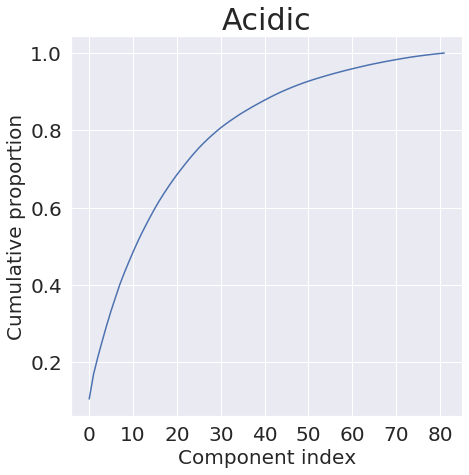

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(range(pca.cumvar.size), pca.cumvar)

ax.set_xlabel('Component index', fontsize=20)
ax.set_ylabel('Cumulative proportion', fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax.set_title('Acidic', fontsize=30)

# plt.savefig('cum_dist_acd.png')

In [10]:
cluster = pyemma.coordinates.cluster_kmeans(pca.get_output(), k=1000, max_iter=50, stride=10)

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

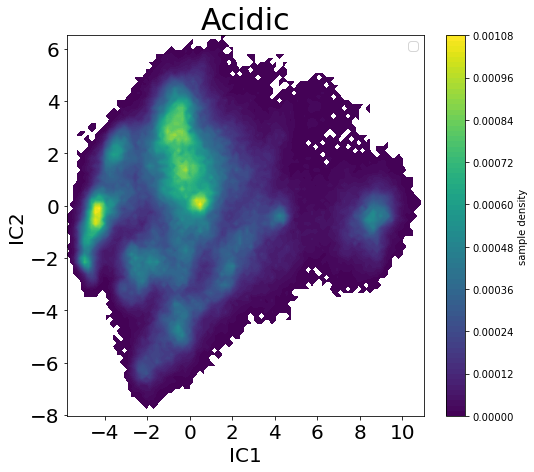

In [11]:
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
# ax.scatter(*cluster.clustercenters.T[:2], s=10, c='C1', label='cluster centers')
ax.set_xlabel('IC1', fontsize=20)
ax.set_ylabel('IC2', fontsize=20)
ax.set_title('Acidic', fontsize=30)
ax.legend(fontsize=12)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.savefig('densitymap_acd.png')

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

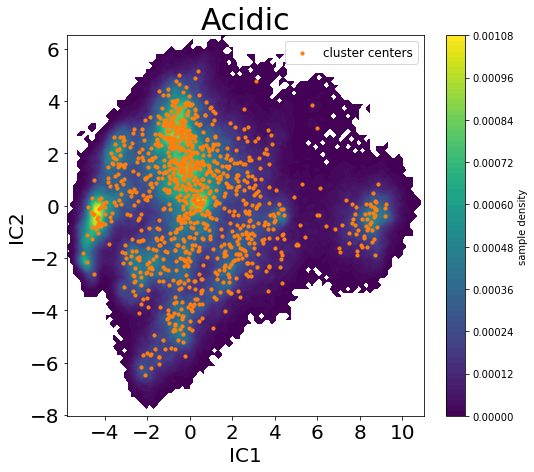

In [11]:
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
ax.scatter(*cluster.clustercenters.T[:2], s=10, c='C1', label='cluster centers')
ax.set_xlabel('IC1', fontsize=20)
ax.set_ylabel('IC2', fontsize=20)
ax.set_title('Acidic', fontsize=30)
ax.legend(fontsize=12)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

# plt.savefig('pca_densitymap_acd.png')

### implied timescale

In [46]:
its = pyemma.msm.its(cluster.dtrajs, nits=6, errors='bayes')

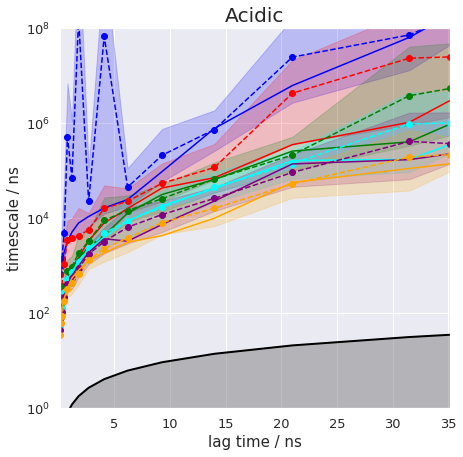

In [47]:
sns.set()

fig, ax = plt.subplots(figsize=(7,7))
pyemma.plots.plot_implied_timescales(its, ylog=True, units='ns', dt=0.1, confidence=0.95)
ax.set_title('Acidic', fontsize=20)
ax.set_ylim(1, 10e7)
plt.gca().xaxis.get_label().set_fontsize(15)
plt.gca().yaxis.get_label().set_fontsize(15)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(13)


plt.savefig('lag_time_acd.png')

### monomer

In [26]:
top_path = '/home/yuki/mnt/structure-ini/T-REMD/acd/analysis/prmtop.parm7'
traj_path = '/home/yuki/mnt/structure-ini/T-REMD/acd/analysis/mdcrd.310.nc'

In [27]:
feat_monomer = pyemma.coordinates.featurizer(top_path)
feat_monomer.add_backbone_torsions(periodic=False)

In [28]:
data_monomer = pyemma.coordinates.load(traj_path, features=feat_monomer)

In [29]:
data_monomer[0].shape

(82,)

In [30]:
converted_data_monomer = pca.transform(data_monomer)
converted_data_monomer.shape

(25000, 30)

In [31]:
cluster_monomer = pyemma.coordinates.cluster_kmeans(converted_data_monomer, k=500, max_iter=50, stride=10)

/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

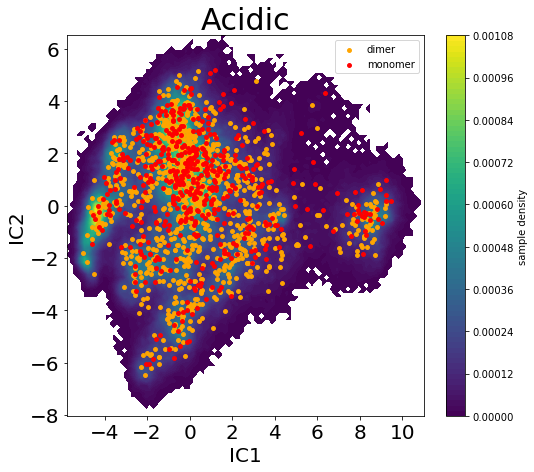

In [32]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[:2], ax=ax, cbar=True)
ax.scatter(*cluster.clustercenters.T[:2], c='orange', label='dimer', s=15)
ax.scatter(*cluster_monomer.clustercenters.T[:2], c='red', label='monomer', s=15)

ax.set_title('Acidic', fontsize=30)
ax.set_xlabel('IC1', fontsize=20)
ax.set_ylabel('IC2', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.legend()
# plt.savefig('monomer_dimer_acd.png')

### msm

In [12]:
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=100, dt_traj='100 ps')

In [40]:
msm.active_state_fraction

0.995

In [12]:
with open('msm.pickle', 'rb') as f:
    msm = pickle.load(f)

### macro states

In [13]:
nstates = 10
msm.pcca(nstates)

PCCA(P=array([[0.69266, 0.     , ..., 0.     , 0.     ],
       [0.     , 0.41906, ..., 0.     , 0.     ],
       ...,
       [0.     , 0.     , ..., 0.15094, 0.     ],
       [0.     , 0.     , ..., 0.     , 0.63175]]),
   m=10)

In [14]:
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i, msm.pi[s].sum()))

π_0 = 0.001891
π_1 = 0.004355
π_2 = 0.012561
π_3 = 0.012952
π_4 = 0.021731
π_5 = 0.026764
π_6 = 0.215881
π_7 = 0.165019
π_8 = 0.191580
π_9 = 0.347267


In [15]:
dtrajs_concatenated = np.concatenate(cluster.dtrajs)
dtrajs_concatenated.shape

(572748,)

In [16]:
dtrajs_concatenated_connected = np.array([i for i in dtrajs_concatenated if i <= 994])
dtrajs_concatenated_connected

array([348, 308, 454, ..., 105, 678, 923], dtype=int32)

In [17]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated_connected]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [18]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

In [49]:
mfpt

array([[0.00000000e+00, 4.04575967e+08, 4.01905463e+08, 3.50270376e+09,
        1.50192883e+08, 6.57199707e+07, 4.65761059e+06, 8.21834597e+08,
        1.33672453e+08, 1.11951927e+08],
       [2.67954010e+09, 0.00000000e+00, 3.97286933e+08, 3.54031547e+09,
        1.60079963e+08, 9.48459399e+07, 7.73361399e+06, 7.35418031e+08,
        1.40193567e+08, 1.21036063e+08],
       [2.67567710e+09, 4.00429567e+08, 0.00000000e+00, 3.52627812e+09,
        1.37400022e+08, 8.78869392e+07, 7.75323104e+06, 8.22872800e+08,
        1.32061278e+08, 1.17985632e+08],
       [2.68248346e+09, 4.45384463e+08, 4.31474979e+08, 0.00000000e+00,
        1.81479761e+08, 1.12101241e+08, 4.31949932e+07, 8.63882254e+08,
        1.71104189e+08, 1.54959616e+08],
       [2.67081586e+09, 4.05994451e+08, 3.86968335e+08, 3.51839506e+09,
        0.00000000e+00, 7.87592665e+07, 5.27111355e+06, 8.23321116e+08,
        1.35366995e+08, 1.08702351e+08],
       [2.64906421e+09, 4.03532410e+08, 3.94537427e+08, 3.50663435e+09,
   

(<Figure size 740.692x864 with 1 Axes>, array([[0.37772176, 0.67133081],
        [0.85728286, 1.        ],
        [0.55525827, 0.34222508],
        [0.52655463, 0.60377139],
        [0.27731989, 0.45657157],
        [0.60754316, 0.46951074],
        [0.42554502, 0.49827852],
        [0.        , 0.        ],
        [0.25848308, 0.60701917],
        [0.40756937, 0.34622483]]))

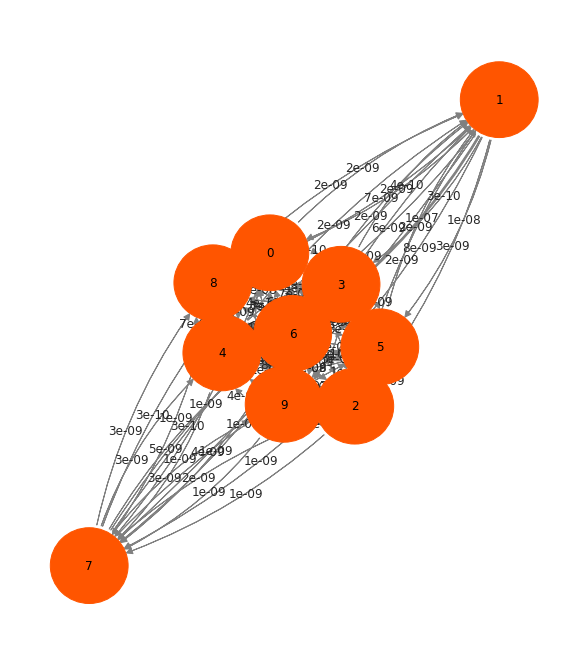

In [38]:
pyemma.plots.plot_network(
    inverse_mfpt,
#     pos=coarse_state_centers,
#     figpadding=0,
#     arrow_label_format='%.1f ps',
#     arrow_labels=mfpt,
#     size=12,
#     show_frame=True,
)

In [45]:
for i, s in enumerate(msm.metastable_sets):
    print('π_{} = {:f}'.format(i, msm.pi[s].sum()))

π_0 = 0.001891
π_1 = 0.004355
π_2 = 0.012561
π_3 = 0.012952
π_4 = 0.021731
π_5 = 0.026764
π_6 = 0.215881
π_7 = 0.165019
π_8 = 0.191580
π_9 = 0.347267


/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/yuki/miniconda3/envs/pyemma/lib/python3.7/

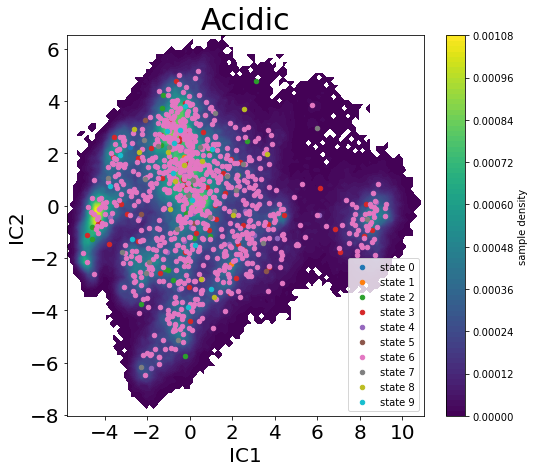

In [50]:
sns.reset_orig()
component = [0,1]
fig, ax = plt.subplots(figsize=(8,7))
pyemma.plots.plot_density(*pca_concatenated.T[component], ax=ax, cbar=True)
for state in range(nstates):
    ax.scatter(*np.array([coord for i, coord in enumerate(cluster.clustercenters) if i in msm.metastable_sets[state]]).T[component], s=20, label=f'state {state}')

ax.set_title('Acidic', fontsize=30)
ax.set_xlabel('IC1', fontsize=20)
ax.set_ylabel('IC2', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.legend()
# plt.savefig('macrostates_acd.png')

### TPT

In [40]:
A = msm.metastable_sets[6]
B = msm.metastable_sets[5]
flux = pyemma.msm.tpt(msm, A, B)

In [47]:
cg, cgflux = flux.coarse_grain(msm.metastable_sets)

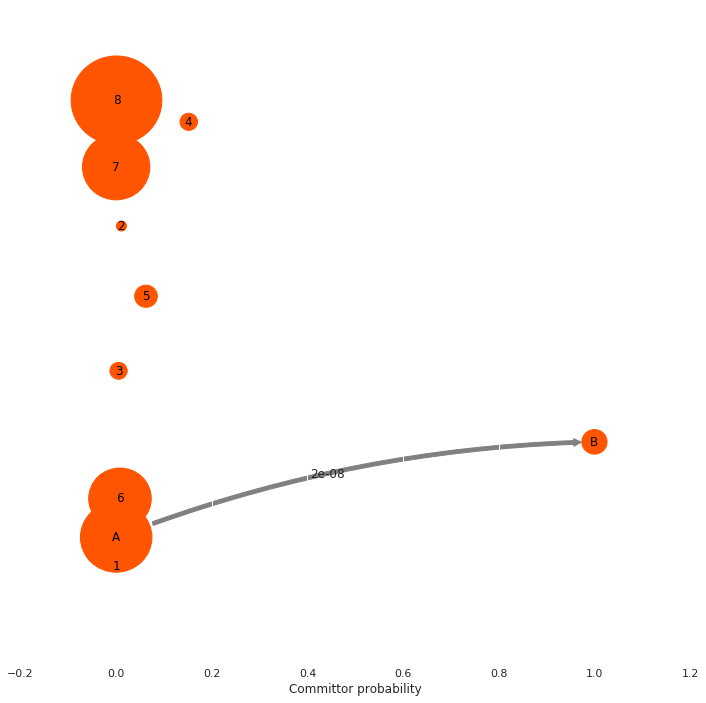

In [64]:
pyemma.plots.plot_flux(
    cgflux,
    state_sizes=cgflux.stationary_distribution,
#     show_committor=False
)
plt.show()

In [85]:
cgflux.mfpt

56813700.61266519

### Calculation of physical values

In [19]:
import mdtraj

In [20]:
markov_samples = [smpl for smpl in msm.sample_by_state(10)]

In [21]:
reader = pyemma.coordinates.source(traj_files_main + traj_files_extension, features=feat_pep)

In [22]:
samples = [pyemma.coordinates.save_traj(reader, smpl, outfile=None) for smpl in markov_samples]

In [54]:
traj_monomer = mdtraj.load(traj_path, top=top_path)

#### Rg

In [55]:
metastable_rg = []
for state_i in range(nstates):
    metastable_rg.append([mdtraj.compute_rg(samples[i]) for i in msm.metastable_sets[state_i]])

In [56]:
metastable_rg_concatenated = [np.concatenate(rg_one_state) for rg_one_state in metastable_rg]

In [57]:
rg_mean = [rg.mean() for rg in metastable_rg_concatenated]
rg_mean

[1.0858748994304548,
 1.1971400775278302,
 1.0176691105398767,
 1.0634910195670921,
 1.1307840377952163,
 1.2790435339763784,
 1.111354280704497,
 1.0864176204506486,
 1.066351714499782,
 1.0605803901901687]

In [58]:
rg_monomer = mdtraj.compute_rg(traj_monomer)
rg_monomer

array([2.10161504, 1.33023406, 1.38629018, ..., 1.12693523, 1.11781399,
       1.10503062])

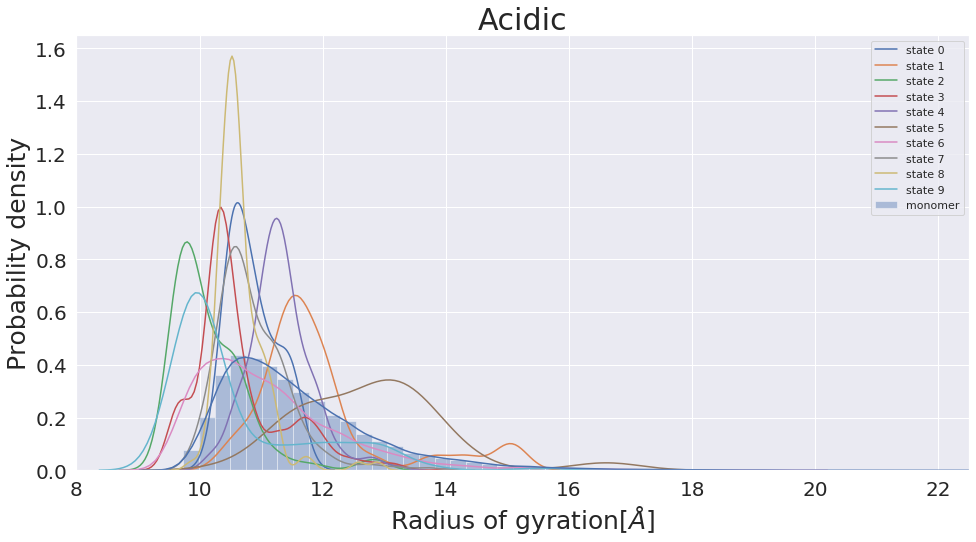

In [59]:
sns.set()
# sns.set_style(style='darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
for i in range(nstates):
    if i not in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        continue
    sns.distplot(metastable_rg_concatenated[i] * 10, label=f'state {i}', norm_hist=True, kde=True, hist=False)
sns.distplot(rg_monomer * 10, label='monomer')

# sns.distplot(metastable_rg_concatenated[1], norm_hist=True)

ax.set_title('Acidic', fontsize=30)
ax.set_xlabel('Radius of gyration[$\AA$]', fontsize=25)
ax.set_ylabel('Probability density', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax.set_xlim(8, 22.5)
ax.legend()
# plt.savefig('rg_acd.png')

#### SASA

In [282]:
import copy
samples_sasa = copy.copy(samples)

In [144]:
metastable_sasa = []
for state_i in range(nstates):
    metastable_sasa.append([mdtraj.shrake_rupley(samples_sasa[i]) for i in msm.metastable_sets[state_i]])

In [145]:
metastable_sasa_concatenated = [np.concatenate(sasa_one_state) for sasa_one_state in metastable_sasa]

In [146]:
sasa_mean = [sasa.mean() for sasa in metastable_sasa_concatenated]
sasa_mean

[0.06106608,
 0.059655353,
 0.06046783,
 0.056499332,
 0.054265693,
 0.053390626,
 0.056191456,
 0.059715867,
 0.058313858,
 0.05828847]

In [326]:
resnames = ['ALA', 'PHE', 'HIS', 'VAL', 'LEU', 'ILE', 'MET']
selection = ' or '.join(['resname ' + resname for resname in resnames])

In [327]:
samples_sasa[0].topology.select(selection)

array([ 14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 33

In [328]:
samples_sasa[0].topology

<mdtraj.Topology with 1 chains, 42 residues, 630 atoms, 636 bonds at 0x7f3c40313b10>

### secondary structure

In [166]:
# coordinate file lists
traj_files_main_dimer = list(p_main.glob('20*/production_dry.nc'))

traj_files_extension_dimer = list(p_extension.glob('20*/extension_dry.nc'))

traj_files_main_dimer = [file.as_posix() for file in traj_files_main_dimer]
traj_files_extension_dimer = [file.as_posix() for file in traj_files_extension_dimer]

len(traj_files_main_dimer)

# define features
feat_pep_dimer = pyemma.coordinates.featurizer('./repo/stripped.initial_wat_ion.parm7') 
feat_pep_dimer.add_backbone_torsions(periodic=True)

# 相方もトラジェクトリ内に存在しないといけないため読み込む
reader_dimer = pyemma.coordinates.source(traj_files_main_dimer + traj_files_extension_dimer, features=feat_pep_dimer)

In [243]:
markov_samples_dimer = []
for i in range(len(markov_samples)):
    subtract = np.zeros_like(markov_samples[i])
    subtract[:,0] = (markov_samples[i][:,0] >= len(traj_files_main_dimer) + len(traj_files_extension_dimer))
    markov_samples_dimer.append(markov_samples[i] - subtract * (len(traj_files_main_dimer) + len(traj_files_extension_dimer)))

In [93]:
samples_dimer = [pyemma.coordinates.save_traj(reader, smpl, outfile=None) for smpl in markov_samples]

In [139]:
metastable_dssp = []
for state_i in range(nstates):
    metastable_dssp.append([mdtraj.compute_dssp(samples[i], simplified=True) for i in msm.metastable_sets[state_i]])

In [140]:
metastable_dssp_concatenated = [np.concatenate(metastable_dssp[i]).flatten() for i in range(nstates)]

In [176]:
metastable_dssp_count = []
for state in range(nstates):
    n_helix = np.array(metastable_dssp_concatenated[state] == 'H').sum()
    n_strand = np.array(metastable_dssp_concatenated[state] == 'E').sum()
    n_bend = np.array(metastable_dssp_concatenated[state] == 'C').sum()
    n_all = n_helix + n_strand + n_bend
    metastable_dssp_count.append(np.array([n_helix/n_all, n_strand/n_all, n_bend/n_all]))

In [250]:
metastable_dssp_count

[array([0.26130952, 0.00952381, 0.72916667]),
 array([0.37698413, 0.00634921, 0.61666667]),
 array([0.27690476, 0.02916667, 0.69392857]),
 array([0.18230159, 0.21297619, 0.60472222]),
 array([0.35357143, 0.06137566, 0.58505291]),
 array([0.26333333, 0.03333333, 0.70333333]),
 array([0.44241907, 0.01410935, 0.54347158]),
 array([0.21242236, 0.0426501 , 0.74492754]),
 array([0.21626984, 0.04384921, 0.73988095]),
 array([0.30805861, 0.03406593, 0.65787546])]

In [251]:
np.stack(metastable_dssp_count)

array([[0.26130952, 0.00952381, 0.72916667],
       [0.37698413, 0.00634921, 0.61666667],
       [0.27690476, 0.02916667, 0.69392857],
       [0.18230159, 0.21297619, 0.60472222],
       [0.35357143, 0.06137566, 0.58505291],
       [0.26333333, 0.03333333, 0.70333333],
       [0.44241907, 0.01410935, 0.54347158],
       [0.21242236, 0.0426501 , 0.74492754],
       [0.21626984, 0.04384921, 0.73988095],
       [0.30805861, 0.03406593, 0.65787546]])

In [253]:
helix = np.stack(metastable_dssp_count)[:,0]
strand = np.stack(metastable_dssp_count)[:,1]
bend = np.stack(metastable_dssp_count)[:,2]

AttributeError: module 'seaborn' has no attribute 'bar'

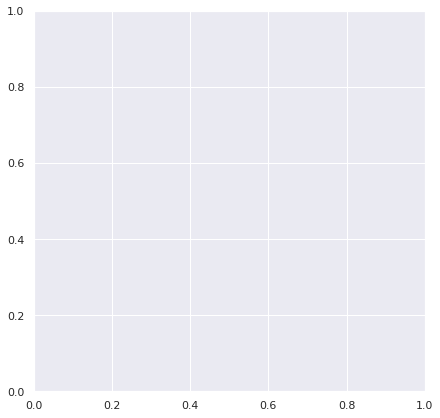

In [254]:
fig, ax = plt.subplots(figsize=(7,7))

sns.bar(helix)

#### Contacts

In [81]:
metastable_contacts = []
for state_i in range(nstates):
    # 各ミクロ状態（約1000個）はそれぞれ10個のスナップショットを持つ（ランダムに選ばれている）
    # 各マクロ状態に属するミクロ状態のスナップショットをすべて結合してコンタクトを計算する
    trajs_state_i = [samples[i] for i in msm.metastable_sets[state_i]]
    metastable_contacts.append(mdtraj.compute_contacts(mdtraj.join(trajs_state_i)))

In [89]:
metastable_contacts[0][0].shape

(40, 780)

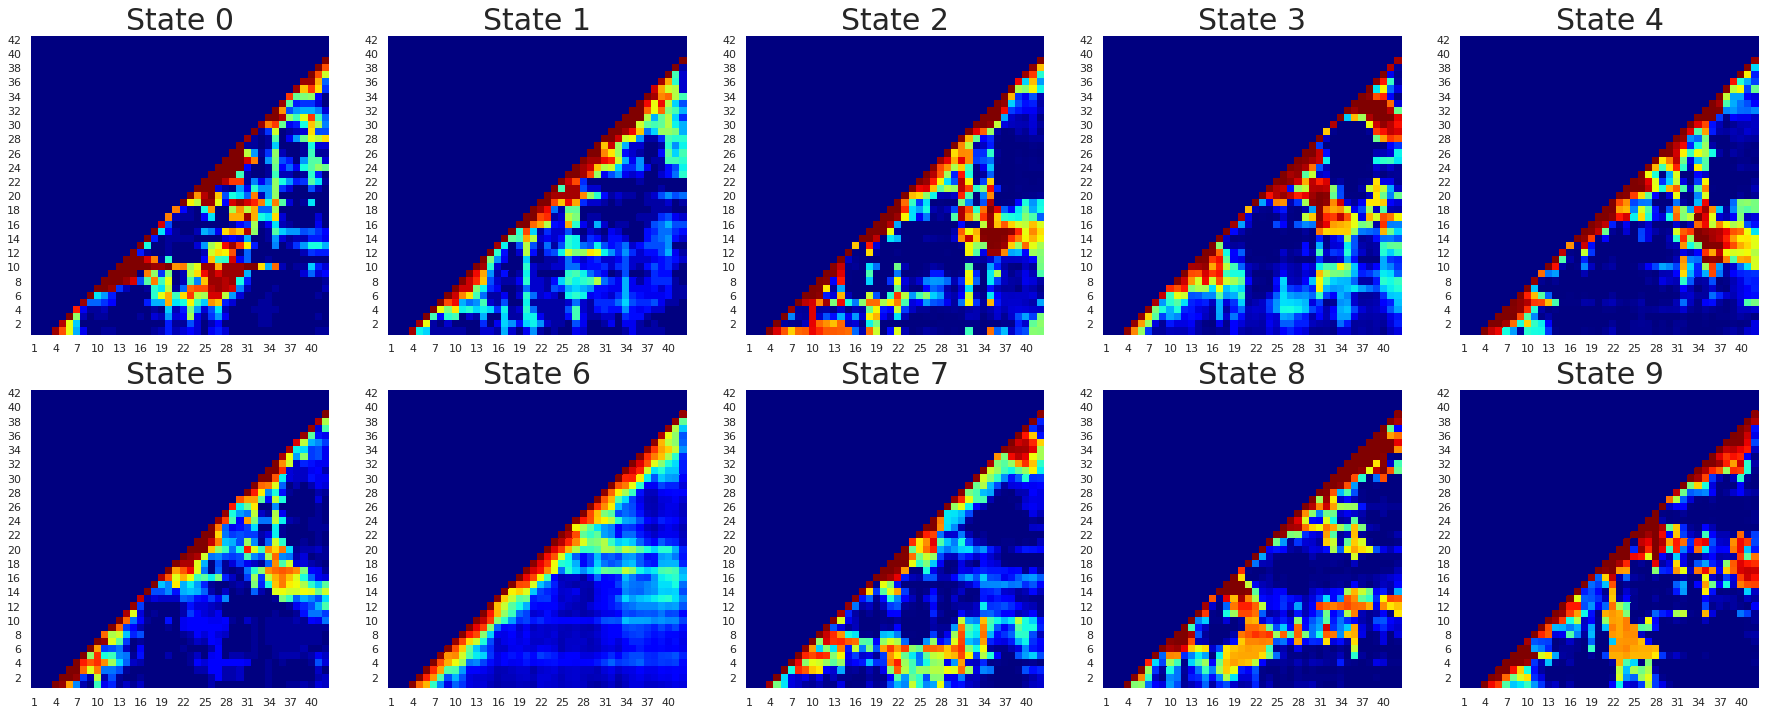

In [189]:
sns.set()
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

for i, ax in enumerate(axes.flatten()):
#     print(ax)
    contact_map = np.zeros((42, 42))
    contacts_bool = metastable_contacts[i][0] * 10 < 8
    contacts_mean = np.mean(contacts_bool, axis=0)
    for mean, pair in zip(contacts_mean, metastable_contacts[i][1]):
        contact_map[pair[0], pair[1]] = mean
    df = pd.DataFrame(contact_map, columns=range(1,43), index=range(1,43))
    sns.heatmap(df.sort_index(ascending=False), cmap='jet', ax=ax, square=True, cbar=False)
    ax.set_title(f'State {i}', fontsize=30)

fig.tight_layout()
plt.savefig('contacts_acd.png')

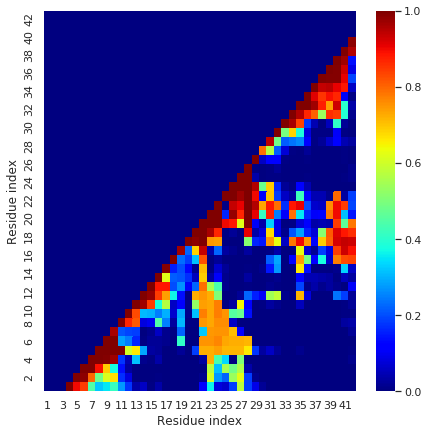

In [176]:
sns.set()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.sort_index(ascending=False), cmap='jet')
ax.set_xlabel('Residue index')
ax.set_ylabel('Residue index')

plt.show()

In [188]:
ax.get_visible

<bound method Artist.get_visible of <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c1b0f1e90>>